# Car brand classification using deep learning

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
import zipfile
with zipfile.ZipFile("Datasets.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224,224]

train_path = 'targetdir/Datasets/train'
valid_path = 'targetdir/Datasets/test'

In [5]:
# import the resnet 50 library as shown below and add preprocessing layer to the front of ResNet 50
# Here we will be using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('targetdir/Datasets/train/*')

In [9]:
folders

['targetdir/Datasets/train\\audi',
 'targetdir/Datasets/train\\lamborghini',
 'targetdir/Datasets/train\\mercedes']

In [10]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [13]:
# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
# use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# make sure you provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory('targetdir/Datasets/train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 64 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('targetdir/Datasets/test',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 58 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. it will take some time to execute
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 16s 8s/step - loss: 6.9145 - accuracy: 0.3438 - val_loss: 3.7448 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 15s 7s/step - loss: 5.6067 - accuracy: 0.3438 - val_loss: 8.8084 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 15s 7s/step - loss: 9.2501 - accuracy: 0.3125 - val_loss: 6.0439 - val_accuracy: 0.4828
Epoch 4/50
2/2 [==============================] - 15s 7s/step - loss: 6.0511 - accuracy: 0.4219 - val_loss: 3.7383 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 15s 7s/step - loss: 2.4303 - accuracy: 0.4375 - val_loss: 5.3475 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 15s 7s/step - loss: 4.5507 - accuracy: 0.3906 - val_loss: 7.3537 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 15s 7s/step - loss: 4.3770 - accuracy: 0.4375 

In [18]:
r.history

{'loss': [6.91449499130249,
  5.606714248657227,
  9.250086784362793,
  6.051114082336426,
  2.4303290843963623,
  4.550671577453613,
  4.377029895782471,
  4.195648193359375,
  1.101242184638977,
  3.0655198097229004,
  2.425858974456787,
  1.0794223546981812,
  1.8211780786514282,
  0.7234395742416382,
  1.1495596170425415,
  1.0040943622589111,
  0.8616770505905151,
  0.7164807915687561,
  0.6138104200363159,
  0.7257777452468872,
  0.47919440269470215,
  0.6058436632156372,
  0.44842275977134705,
  0.57419353723526,
  0.4135929048061371,
  0.37752753496170044,
  0.4119938611984253,
  0.41687747836112976,
  0.36682868003845215,
  0.3643651306629181,
  0.3391881287097931,
  0.24478885531425476,
  0.3620639443397522,
  0.3388369381427765,
  0.29475560784339905,
  0.28133517503738403,
  0.3514624238014221,
  0.2674371004104614,
  0.31140369176864624,
  0.25144657492637634,
  0.2800319194793701,
  0.21743755042552948,
  0.217453271150589,
  0.2522856891155243,
  0.23167145252227783,
  0

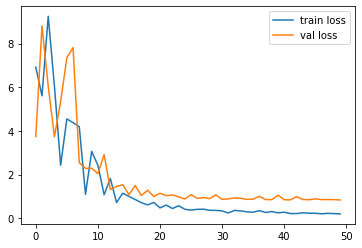

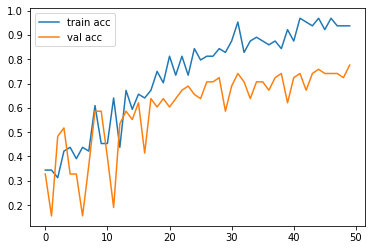

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [21]:
y_pred=model.predict(test_set)

In [22]:
y_pred

array([[1.48867434e-02, 9.54273820e-01, 3.08394004e-02],
       [2.75396332e-02, 8.89654160e-01, 8.28062072e-02],
       [5.64980030e-04, 8.46035182e-01, 1.53399810e-01],
       [3.91235314e-02, 6.32437110e-01, 3.28439355e-01],
       [3.26611962e-06, 7.94211926e-04, 9.99202549e-01],
       [6.40498102e-02, 4.23571244e-02, 8.93593013e-01],
       [1.32030426e-02, 3.51727265e-03, 9.83279705e-01],
       [6.39492720e-02, 5.80772698e-01, 3.55278015e-01],
       [7.92582408e-02, 1.22995405e-02, 9.08442199e-01],
       [1.66350491e-02, 9.15248156e-01, 6.81167468e-02],
       [1.74644869e-02, 8.52072597e-01, 1.30462930e-01],
       [2.67269015e-02, 3.62494946e-01, 6.10778153e-01],
       [6.44660354e-01, 2.97702830e-02, 3.25569421e-01],
       [1.46478221e-01, 6.39889777e-01, 2.13631988e-01],
       [4.28971695e-03, 2.07129180e-01, 7.88581133e-01],
       [6.68456256e-02, 7.71715701e-01, 1.61438689e-01],
       [1.43713737e-03, 9.89512622e-01, 9.05029103e-03],
       [1.75589342e-02, 7.69612

In [23]:
import numpy as np
y_pred=np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2,
       1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1], dtype=int64)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_resnet50.h5')

In [36]:
img_data

array([[[[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.264496, -116.04567 , -122.91137 ],
         [-103.18214 , -115.96331 , -122.82902 ],
         [-103.08018 , -115.86135 , -122.72706 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.00959 , -115.818214, -122.719215],
         [-103.01743 , -115.82606 , -122.72706 ],
         [-103.021355, -115.82998 , -122.73098 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-102.96645 , -115.80253 , -122.73882 ],
         [-102.95861 , -115.794685, -122.73098 ],
         [-102.95861 , -115.794685, -122.73098 ]],

        ...,

        [[-103.04096 , -115.96723 , -1

In [28]:
img=image.load_img('targetdir/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [29]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [30]:
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
model.predict(img_data)

array([[0.00478859, 0.0039251 , 0.99128634]], dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

In [35]:
a==1

array([False])